In [1]:
# This is a sample Python script.

# Press ⌃R to execute it or replace it with your code.
# Press Double ⇧ to search everywhere for classes, files, tool windows, actions, and settings.

import random
import pandas as pd
import matplotlib.pyplot as plt


# The only missing method is the portal where we can get the data

def getDataset():
    data = pd.read_csv("mushroom-attributions-200-samples.csv")
    data = data[['odor', 'bruises']]  # Reduce dims of dataset in order to visualize
    dataset = []
    for i in range(50):
        dataset.append(data.loc[i])
    return dataset


# data: the actual data we use for this algorithm, it is a collection of data points, each point has dimension dims
def computeDistance(i, j, data):
    dims = len(data[0])
    dis = 0
    for x in range(dims):
        dis += (data[i][x] - data[j][x]) ** 2
    return dis ** .5


def buildRankTable(data):
    n = len(data)
    rank = [[(0, 0) for i in range(n)] for j in range(n)]
    similarityMetrix = [[(0, 0) for i in range(n)] for j in range(n)]
    for i in range(n):
        for j in range(i, n):
            d = computeDistance(i, j, data)
            rank[i][j] = (d, j)
            rank[j][i] = (d, i)
    for i in range(n):
        rank[i].sort(key=lambda x: x[0])
        r = 0
        rankings = []
        for j in range(n):
            rankings.append(r)
            if j <= n - 2 and rank[i][j][0] == rank[i][j + 1][0]:
                r -= 1
            r += 1
            similarityMetrix[i][j] = rank[i][j][1]
            rank[i][j] = rank[i][j][1]

        newList = [0] * n
        for j in range(n):
            newList[rank[i][j]] = rankings[j]

        rank[i] = newList
    return rank, similarityMetrix


# tableS: a nxn matrix containing all Sij values
# setG: set of integers - indexes of data points
def getHv(index, n, rankTable, setG):
    m = len(setG)
    hv = m * (m + 1) / 2
    for j in range(n):
        if not j in setG:
            for r in rankTable[index]:
                if r < rankTable[index][j]:
                    hv += 1
    return hv


def randomMedoids(k, data):
    medoids = []
    for i in range(k):
        medoids.append(random.randint(0, len(data)))
    return medoids


def assignToGroups(m, medoids, rankTable, similarityMetrix):
    groups = []  # list of Set
    for medoid in medoids:
        group = set(similarityMetrix[medoid][:m])
        groups.append(group)
    return groups


def printNice(table):
    for i in table:
        print(i)


def drawTwoDims(groups):
    plt.plot(groups)




if __name__ == '__main__':
    data = getDataset()
    n = len(data)
    numOfLoops = 1000
    k = 5
    m = 20
    medoids = randomMedoids(k, data)
    rankTable, similarityMetrix = buildRankTable(data)
    for i in range(numOfLoops):
        groups = assignToGroups(m, medoids, rankTable, similarityMetrix)
        newMedoids = []
        for group in groups:

            # The first position stores the new medoid, the second stores the maximum hv value
            maxHv = (-1, -1)
            for point in group:
                hv = getHv(point, n, rankTable, group)
                if hv > maxHv[1]:
                    maxHv = (point, hv)
            newMedoids.append(maxHv[0])
        medoids = newMedoids
    # Output: Groups!
    drawTwoDims(groups)


TypeError: float() argument must be a string or a number, not 'set'

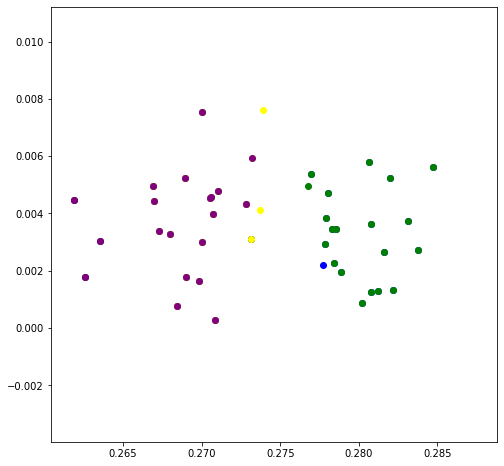

In [80]:
colors = ['blue','black','yellow','green','purple']
m = 0
plt.figure(figsize=(8,8))

for g in groups:
    for i in g:
        x = data[i][0]
        y = data[i][1]
        plt.scatter(x,y, color = colors[m])
    m+=1

plt.show()


In [7]:

def MushroomDataset():
    df = pd.read_csv('mushroom-attributions-200-samples.csv')
    dataset = []
    for i in range(len(df)):
        dataset.append(df.loc[i])
    return dataset

In [19]:
df = pd.read_csv('mushroom-attributions-200-samples.csv')
df.columns[1]

'cap-surface'

In [20]:
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0.016661,0.004544,0.036320,0.007534,0.269996,0.002505,0.023969,0.034541,0.074068,0.034345,...,0.015280,0.057694,0.050566,0.0,0.013254,0.005664,0.048310,0.097754,0.083288,0.037258
1,0.018922,0.005227,0.037307,0.003991,0.270732,0.004991,0.027980,0.032026,0.078145,0.031975,...,0.014648,0.054664,0.051420,0.0,0.011206,0.009371,0.043562,0.092596,0.083774,0.040856
2,0.013075,0.006795,0.038247,0.003619,0.280797,0.003759,0.025386,0.035658,0.070191,0.033224,...,0.019395,0.050074,0.054422,0.0,0.010304,0.009302,0.051950,0.096102,0.075113,0.035840
3,0.014461,0.005521,0.041748,0.001958,0.278882,0.003024,0.029891,0.038193,0.069392,0.034009,...,0.015458,0.055456,0.053629,0.0,0.006905,0.003655,0.048376,0.097098,0.077951,0.035977
4,0.022152,0.003209,0.033911,0.003361,0.275670,0.003037,0.028570,0.038000,0.072029,0.033123,...,0.018045,0.051577,0.055083,0.0,0.011782,0.011039,0.046271,0.093645,0.073013,0.037795
5,0.019623,0.007229,0.034465,0.002653,0.281617,0.000130,0.028670,0.036510,0.077242,0.032132,...,0.017551,0.039762,0.045813,0.0,0.012189,0.009944,0.048482,0.099834,0.080554,0.038294
6,0.017348,0.006030,0.033096,0.002714,0.283745,0.002396,0.028274,0.035895,0.076263,0.030000,...,0.014661,0.046678,0.052959,0.0,0.006167,0.009706,0.045178,0.100797,0.078247,0.042949
7,0.019376,0.007878,0.039996,0.003743,0.283129,0.000670,0.026627,0.036910,0.060446,0.031818,...,0.016135,0.047042,0.057433,0.0,0.010223,0.010265,0.050737,0.090739,0.079530,0.037124
8,0.019512,0.003701,0.048847,0.005807,0.280639,0.000700,0.025949,0.034488,0.066267,0.034944,...,0.013638,0.048342,0.049120,0.0,0.011037,0.008665,0.044093,0.098266,0.077537,0.040387
9,0.019350,0.006096,0.039223,0.001334,0.282193,0.000323,0.026110,0.036087,0.060643,0.030256,...,0.013514,0.054983,0.054223,0.0,0.012944,0.009592,0.048858,0.094785,0.081638,0.037430


In [22]:
from sklearn.preprocessing import StandardScaler
features = df.columns
# Separating out the features
x = df.loc[:, features].values
# Separating out the target

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [29]:
principalDf

,principal component 1,principal component 2
0,0.699528,0.217255
1,2.084135,0.187066
2,1.213776,1.190444
3,-0.856360,0.636036
4,0.598828,1.147643
5,-1.087630,0.972932
6,-0.934299,1.106910
7,-0.599383,-1.228610
8,-1.825165,-1.663036
9,-0.295720,-0.815769


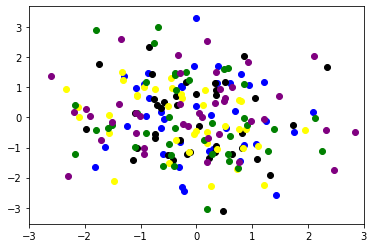

In [39]:
colors = ['blue','black','yellow','green','purple']
plt.xlim(-3,3)
for i in range(200):
    if i < 40:
        plt.scatter(principalDf.loc[i][0], principalDf.loc[i][1], c=colors[0])
    elif i < 80:
        plt.scatter(principalDf.loc[i][0], principalDf.loc[i][1], c=colors[1])
    elif i < 120:
        plt.scatter(principalDf.loc[i][0], principalDf.loc[i][1], c=colors[2])
    elif i < 160:
        plt.scatter(principalDf.loc[i][0], principalDf.loc[i][1], c=colors[3])
    else:
        plt.scatter(principalDf.loc[i][0], principalDf.loc[i][1], c=colors[4])


In [40]:
# This is a sample Python script.

# Press ⌃R to execute it or replace it with your code.
# Press Double ⇧ to search everywhere for classes, files, tool windows, actions, and settings.

import random
import pandas as pd
import matplotlib.pyplot as plt


def getDataset():
    data = pd.read_csv("mushroom-attributions-200-samples.csv")
    data = data[['odor', 'bruises']]  # Reduce dims of dataset in order to visualize
    dataset = []
    l = len(data)
    # l = 100
    for i in range(l):
        dataset.append(data.loc[i])
    return dataset


def generate2dData():
    xs = []
    ys = []
    n = 500
    for i in range(n):
        xs.append(random.random())
        ys.append(random.random())
        if i > .9 * n:
            xs.append(random.random() + .5)
            ys.append(random.random() + .5)
    data = []
    for i in range(n):
        data.append([xs[i], ys[i]])
    return data


# data: the actual data we use for this algorithm, it is a collection of data points, each point has dimension dims
def computeDistance(i, j, data):
    dims = len(data[0])
    dis = 0
    for x in range(dims):
        dis += (data[i][x] - data[j][x]) ** 2
    return dis ** .5


def buildRankTable(data):
    n = len(data)
    rank = [[(0, 0) for i in range(n)] for j in range(n)]
    similarityMetrix = [[(0, 0) for i in range(n)] for j in range(n)]

    # Compute the distance and record them in a tuple
    for i in range(n):
        for j in range(i, n):
            d = computeDistance(i, j, data)
            rank[i][j] = (d, j)
            rank[j][i] = (d, i)

    for i in range(n):
        rank[i].sort(key=lambda x: x[0])  # Sort based on distances
        r = 0
        rankings = []
        for j in range(n):
            rankings.append(r)
            if j <= n - 2 and rank[i][j][0] == rank[i][j + 1][0]:
                r -= 1
            r += 1
            similarityMetrix[i][j] = rank[i][j][1]  # Store the sample points
            rank[i][j] = rank[i][j][1]

        newList = [0] * n
        for j in range(n):
            newList[rank[i][j]] = rankings[j]

        rank[i] = newList

    return rank, similarityMetrix


# tableS: a nxn matrix containing all Sij values
# setG: set of integers - indexes of data points
# n: size of dataset
def getHv(index, m, n, rankTable, setG):
    hv = m * (m + 1) / 2
    for j in range(n):
        if not j in setG:
            for r in rankTable[index]:
                if r < rankTable[index][j]:
                    hv += 1
    return hv


def randomMedoids(k, data):
    medoids = set()
    for i in range(k):
        oldLen = len(medoids)
        while (len(medoids) == oldLen):
            medoids.add(random.randint(0, len(data) - 1))
    return medoids


def assignToClusters(k, n, medoids, rankTable):
    groups = []  # list of Set
    for i in range(k):
        groups.append([])  # Make k empty groups
    medoidsList = list(medoids)

    for i in range(n):
        rankRowI = rankTable[i]
        min = n
        for j in range(k):
            m = medoidsList[j]
            if rankRowI[m] < min:
                min = rankRowI[m]
        for j in range(k):
            m = medoidsList[j]
            if rankRowI[m] == min:
                groups[j].append(i)

        # cursor = 0
        # while (cursor < n):
        #     if similarityMetrix[i][cursor] in medoids:
        #         for groupIndex in range(k):
        #             if similarityMetrix[i][cursor] == medoidsList[groupIndex]:
        #                 groups[groupIndex].append(similarityMetrix[i][cursor])
        #         break  # Break the while loop if found the closest medoid
        #     cursor += 1
    return groups


def updateMedoids(k, m, n, medoids, similarityTable, rankTable):
    newMedoids = set()
    for med in medoids:
        mostSimilar = similarityTable[med][:m]
        maxHv = (-1, -1)
        for simi in mostSimilar:
            hv = getHv(simi, m, n, rankTable, set(mostSimilar))
            if hv > maxHv[1]:
                maxHv = (simi, hv)
        newMedoids.add(maxHv[0])


def printNice(table):
    for i in table:
        print(i)


def testPrintTables(data):
    r, s = buildRankTable(data)
    print("Rank Table: ")
    printNice(r)
    print()
    print("Similarity Table: ")
    printNice(s)


def test1D():
    data = []
    for i in range(3):
        data.append([i])
        data.append([i])
        data.append([i + 10])
        data.append([i + 10])
    main(data)


def test2D():
    main(generate2dData())


def testMushroomDataset():
    df = pd.read_csv('mushroom-attributions-200-samples.csv')
    dataset = []
    for i in range(len(df)):
        dataset.append(df.loc[i])
    main(dataset)


def plotClusters(clusters, data):
    for i in clusters[0]:
        plt.scatter(data[i][0], data[i][1], c='red')
    for i in clusters[1]:
        plt.scatter(data[i][0], data[i][1], c='green')


# This method checks whether there exists some data points in different clusters
def checkClustersContainDifferent(clusters):
    for i in range(len(clusters)):
        for d in clusters[i]:
            for j in range(len(clusters)):
                if i != j:
                    if d in clusters[j]:
                        return False
    return True


def main(data):
    n = len(data)
    numOfLoops = 100
    k = 5
    m = 12
    medoids = randomMedoids(k, data)
    rankTable, similarityMetrix = buildRankTable(data)
    for i in range(numOfLoops):
        updateMedoids(k, m, n, medoids, similarityMetrix, rankTable)
    clusters = assignToClusters(k, n, medoids, rankTable)

    # groups = assignToClusters(k, n, medoids, rankTable)
    # newMedoids = set()
    # for group in groups:
    #
    #     # The first position stores the new medoid, the second stores the maximum hv value
    #     maxHv = (-1, -1)
    #     for point in group:
    #         hv = getHv(point, m, n, rankTable, group)
    #         if hv > maxHv[1]:
    #             maxHv = (point, hv)
    #     newMedoids.add(maxHv[0])
    # medoids = newMedoids
    # Output: Groups!

    if len(data[0]) <= 2:
        plotClusters(clusters, data)

    print(clusters)
    print(checkClustersContainDifferent(clusters))


if __name__ == '__main__':
    # testList = [[9], [11], [9], [8], [20], [7], [4]]
    # testPrintTables(testList)

    # data = getDataset()
    # main(data)

    # test1D()

    # test2D()

    testMushroomDataset()


[[10, 32, 72, 83, 116, 120, 121, 137, 146, 194], [2, 7, 9, 23, 28, 34, 35, 36, 42, 55, 56, 67, 75, 76, 81, 85, 87, 89, 90, 92, 100, 102, 108, 118, 122, 129, 132, 134, 149, 150, 151, 153, 167, 169, 171, 172, 177, 179, 182, 186, 188, 193], [4, 6, 14, 17, 26, 31, 39, 43, 44, 46, 47, 50, 51, 52, 60, 61, 62, 64, 65, 66, 68, 70, 74, 77, 78, 79, 82, 97, 98, 99, 101, 103, 104, 109, 110, 111, 114, 119, 123, 128, 130, 138, 139, 140, 143, 148, 154, 158, 162, 163, 164, 166, 173, 174, 176, 178, 180, 185, 187, 191, 192, 197], [5, 8, 11, 16, 22, 27, 29, 30, 37, 38, 54, 58, 69, 73, 94, 105, 106, 112, 115, 126, 133, 135, 152, 155, 161, 181, 189, 198, 199], [0, 1, 3, 12, 13, 15, 18, 19, 20, 21, 24, 25, 33, 40, 41, 45, 48, 49, 53, 57, 59, 63, 71, 80, 84, 86, 88, 91, 93, 95, 96, 107, 113, 117, 124, 125, 127, 131, 136, 141, 142, 144, 145, 147, 156, 157, 159, 160, 165, 168, 170, 175, 183, 184, 190, 195, 196]]
True


In [42]:
clusters=[[10, 32, 72, 83, 116, 120, 121, 137, 146, 194], [2, 7, 9, 23, 28, 34, 35, 36, 42, 55, 56, 67, 75, 76, 81, 85, 87, 89, 90, 92, 100, 102, 108, 118, 122, 129, 132, 134, 149, 150, 151, 153, 167, 169, 171, 172, 177, 179, 182, 186, 188, 193], [4, 6, 14, 17, 26, 31, 39, 43, 44, 46, 47, 50, 51, 52, 60, 61, 62, 64, 65, 66, 68, 70, 74, 77, 78, 79, 82, 97, 98, 99, 101, 103, 104, 109, 110, 111, 114, 119, 123, 128, 130, 138, 139, 140, 143, 148, 154, 158, 162, 163, 164, 166, 173, 174, 176, 178, 180, 185, 187, 191, 192, 197], [5, 8, 11, 16, 22, 27, 29, 30, 37, 38, 54, 58, 69, 73, 94, 105, 106, 112, 115, 126, 133, 135, 152, 155, 161, 181, 189, 198, 199], [0, 1, 3, 12, 13, 15, 18, 19, 20, 21, 24, 25, 33, 40, 41, 45, 48, 49, 53, 57, 59, 63, 71, 80, 84, 86, 88, 91, 93, 95, 96, 107, 113, 117, 124, 125, 127, 131, 136, 141, 142, 144, 145, 147, 156, 157, 159, 160, 165, 168, 170, 175, 183, 184, 190, 195, 196]]

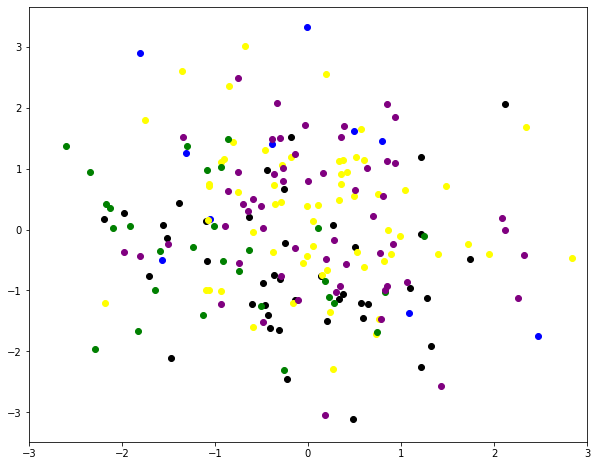

In [46]:
colors = ['blue','black','yellow','green','purple']
plt.figure(figsize=(10,8))
plt.xlim(-3,3)
for i in clusters[0]:
    plt.scatter(principalDf.loc[i][0], principalDf.loc[i][1], c=colors[0])
for i in clusters[1]:
    plt.scatter(principalDf.loc[i][0], principalDf.loc[i][1], c=colors[1])
for i in clusters[2]:
    plt.scatter(principalDf.loc[i][0], principalDf.loc[i][1], c=colors[2])
for i in clusters[3]:
    plt.scatter(principalDf.loc[i][0], principalDf.loc[i][1], c=colors[3])
for i in clusters[4]:
    plt.scatter(principalDf.loc[i][0], principalDf.loc[i][1], c=colors[4])